# Haberman's Servival Data Set

1.The Hebermans data set is collection of patiens who had undergone surgery for breast cancer.
2.The data collected in the years between 1958 to 1970.
3.The data set shows the servival of the patiens who undergone the surgery.
4.It contains four columns i.e (age,operatipn_year,axil_nodes,servival_status)

In [58]:
import pandas as pd #importing pandas library for data processing.
import numpy as np #importing numpy library for numerical operation like linear algebra matirx operation etc.
import matplotlib.pyplot as plt # importing matplotlib.pyplot for the ploting data.
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [59]:
df=pd.read_csv("haberman.csv")
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [60]:
print(df.shape) #it is the shape of the data set,it contains 306 rows and 4 columns

(306, 4)


In [61]:
print(df.columns) # printing the columns of the data set

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [62]:
df["age"].value_counts().head() #printing the perticular age which occures often in data set

52    14
54    13
50    12
47    11
53    11
Name: age, dtype: int64

In [63]:
df["year"][df["year"].value_counts().max()] #prints the highest number of surgeries done in the year

67

In [64]:
df["nodes"].value_counts().head() #it shows the axil counts of the patiens

0    136
1     41
2     20
3     20
4     13
Name: nodes, dtype: int64

In [65]:
df["status"].value_counts()
                        

1    225
2     81
Name: status, dtype: int64

In [66]:
print(list(df["status"].unique()))

[1, 2]


observation
1.servival of the patients more than five years after operation is 228 
2.servival of the patients less than five years after operation is 81



[inbalanced data]

In [67]:
df["status"] = df["status"].map({1:"servived",2:"not_survived"})

In [68]:
df.head() #it prints the some sample first five rows dat from the data sat

,age,year,nodes,status
0,30,64,1,servived
1,30,62,3,servived
2,30,65,0,servived
3,31,59,2,servived
4,31,65,4,servived


In [69]:
df.tail() #it prints the some sample of last rows of the data

,age,year,nodes,status
301,75,62,1,servived
302,76,67,0,servived
303,77,65,3,servived
304,78,65,1,not_survived
305,83,58,2,not_survived


In [70]:
df["age"].max() # it prints the highest age of a person in the data set who undergone for the surgery

83

In [71]:
df["age"].min() # it prints the lowest age of a person in the data set who undergone for surgery

30

In [72]:
df.info() #prints the information of data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null object
dtypes: int64(3), object(1)
memory usage: 9.6+ KB


In [73]:
df.describe()#it describe the values calculation of the data set

,age,year,nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


In [74]:
df["status"].value_counts(normalize = True)

servived        0.735294
not_survived    0.264706
Name: status, dtype: float64

observation

73% of patients are servive more than five years after operation 

27% of patients are not servive more than five years after operation

In [75]:
np.sum(df.isna())#finding the null values in the colomns


age       0
year      0
nodes     0
status    0
dtype: int64

no null values are present in the data set

#  2-D Scatter Plot

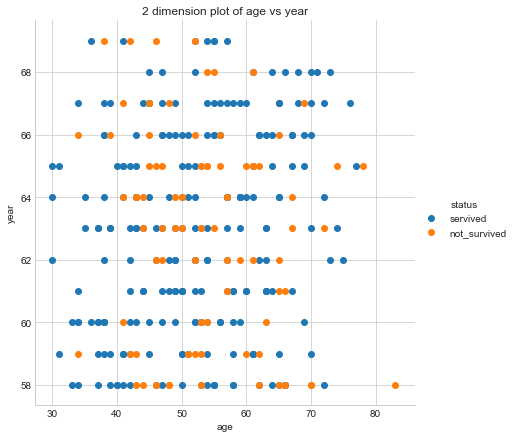

In [76]:
sns.set_style("whitegrid")
sns.FacetGrid(df,hue="status",size = 6) \
   .map(plt.scatter,"age","year") \
   .add_legend()
plt.title("2 dimension plot of age vs year")

plt.show()


1.The above plot shows the age and servival rate of the persons
2.At the age of 30 there less operations are done 
3.As the increases there is more number of surgeries are done

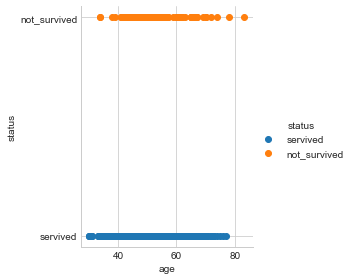

In [77]:
sns.set_style("whitegrid")
sns.FacetGrid(df,hue = "status",size = 4) \
   .map(plt.scatter,"age","status") \
   .add_legend()
plt.show()

observations:
1.blue color is age and orange color is status 
2.at the age of 30 there are more servival of patiens
3.at the above 40 to 5o there are less servival becaluse there is dense of status


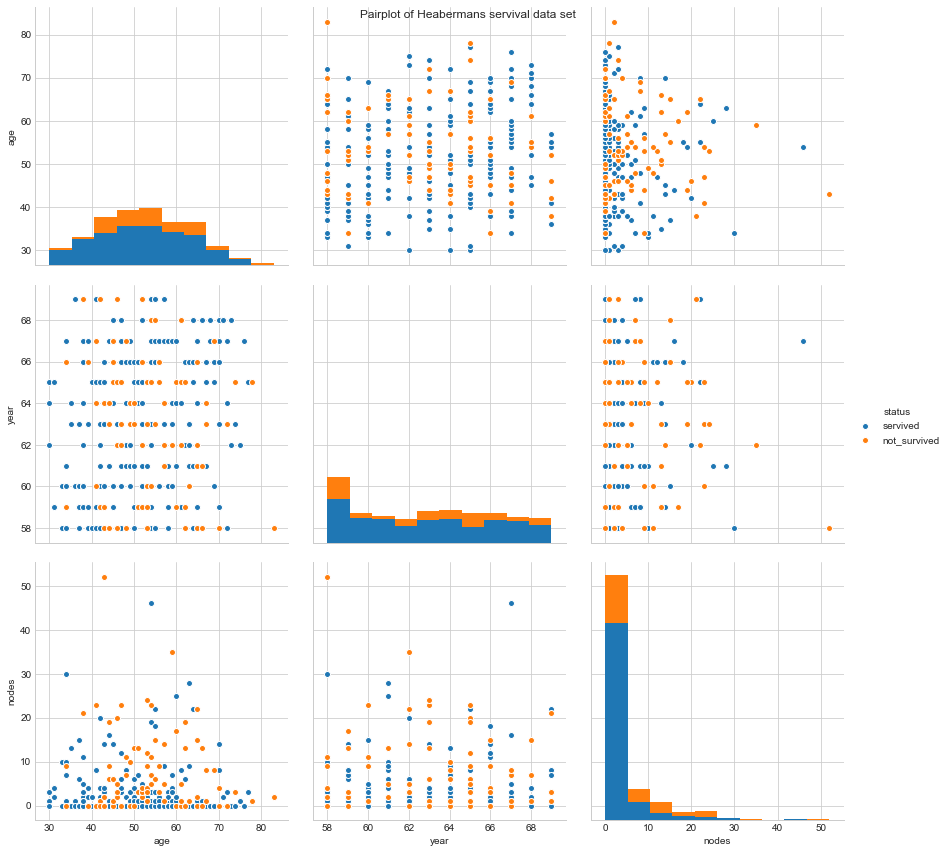

In [78]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(df,size = 4,hue = "status",diag_kind="hist")
plt.suptitle("Pairplot of Heabermans servival data set")
plt.show()

observation:

1.Data cannot be separated linearly

73% of data can be servive more than five years after surgery

# printing mean and standard deviation

In [79]:
df["age"].mean()

52.45751633986928

In [80]:
df["year"].mean()

62.85294117647059

In [81]:
df["nodes"].mean()

4.026143790849673

In [82]:
df["age"].std()

10.80345234930328

In [83]:
df["year"].std()

3.249404663223851

In [84]:
df["nodes"].std()

7.189653506248565

# Printing Median,Percentile,Quantile,IQR,MAD

In [85]:
print(df.median())

age      52.0
year     63.0
nodes     1.0
dtype: float64


In [86]:
df["age"].median()#individual median calculation

52.0

In [87]:
df["year"].median()

63.0

In [88]:
df["nodes"].median()

1.0

In [89]:
print(df.mad())

age      8.865180
year     2.787005
nodes    4.790935
dtype: float64


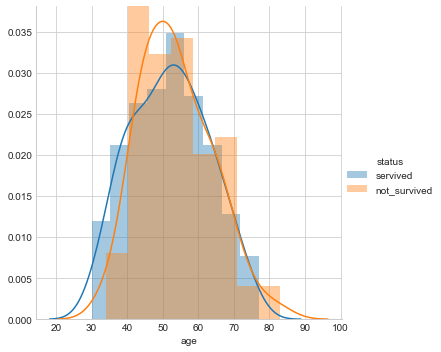

In [90]:
sns.FacetGrid(df,hue = "status",size = 5) \
   .map(sns.distplot,"age") \
   .add_legend()
plt.show()

observation:

The people whose age is 40 to 60 are not servive more than five years after surgery

People whos age is less than 40 and grater than 30 are more likely to servive more than five years ofter surgery

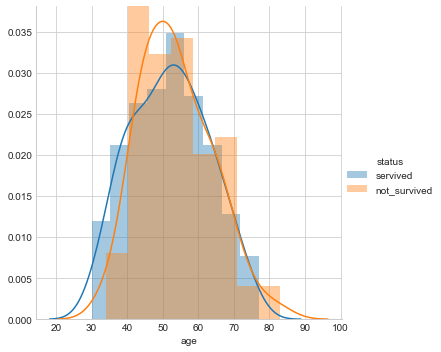

In [91]:
sns.FacetGrid(df,hue = "status",size = 5) \
   .map(sns.distplot,"age") \
   .add_legend()
plt.show()

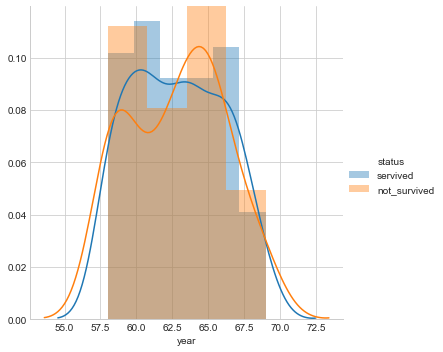

In [92]:
sns.FacetGrid(df,hue = "status",size = 5) \
   .map(sns.distplot,"year")\
   .add_legend()
plt.show()

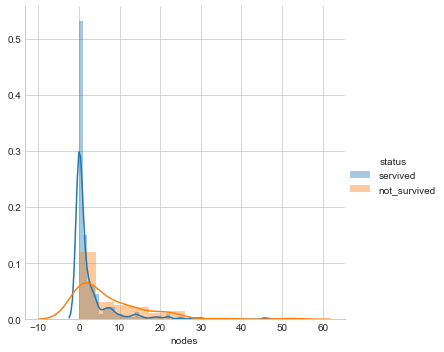

In [93]:
sns.FacetGrid(df,hue = "status",size = 5)\
   .map(sns.distplot,"nodes") \
   .add_legend()
plt.show()

observations:

1.55% people are servived roughly

2.30% people are servived after sergery more than 5 years


[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


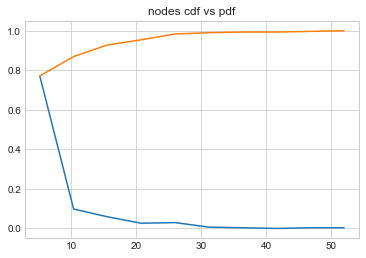

In [94]:
#some code snippent refered form the below kaggle ling
#https://www.kaggle.com/ushayadu/haberman-s-survival-dataset-eda
counts,bin_edges = np.histogram(df["nodes"] , bins = 10,density = True)
pdf = counts / (sum(counts))
print(pdf)
print(bin_edges)

#computing cdf
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.title("nodes cdf vs pdf")
plt.show()

[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


Text(0.5,1,'cdf and pdf of age ')

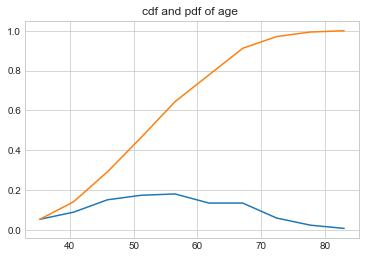

In [95]:
counts,bin_edges = np.histogram(df["age"] , bins = 10,density = True)
pdf = counts / (sum(counts))
print(pdf)
print(bin_edges)

#computing cdf
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.title("cdf and pdf of age ")



[0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


Text(0.5,1,'cdf vs pdf of year')

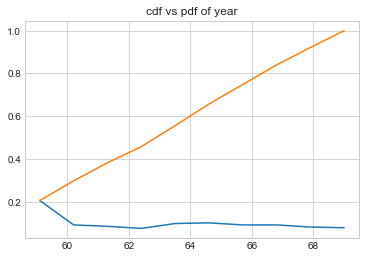

In [96]:
counts,bin_edges = np.histogram(df["year"] , bins = 10,density = True,)
pdf = counts / (sum(counts))
print(pdf)
print(bin_edges)

#computing cdf
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.title("cdf vs pdf of year")


observation:

age is the important feature in the data 
as age increases the servival rate is decreases

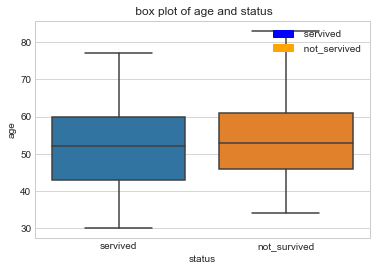

In [97]:
#https://stackoverflow.com/questions/13800193/matplotlib-patches-not-being-displayed
import matplotlib.patches as mpatches
sns.boxplot(x="status",y="age", data=df,).set_title(" box plot of age and status")
l1 = mpatches.Patch(color = "blue",label = " servived")
l2 = mpatches.Patch(color="orange",label = " not_servived")
plt.legend(handles = [l1,l2],loc = 1)
plt.show()


1.patient who having age more than 70years who under gone sergery will not servive more than five years

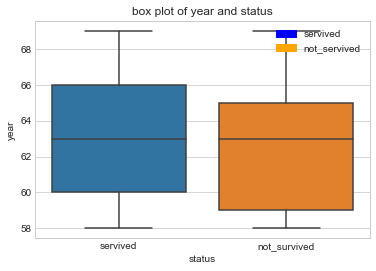

In [98]:
#https://stackoverflow.com/questions/13800193/matplotlib-patches-not-being-displayed
import matplotlib.patches as mpatches
sns.boxplot(x ="status",y="year",data = df).set_title("box plot of year and status")
blue = mpatches.Patch(color   =   "blue",         label = "servived")
orange = mpatches.Patch(color=  "orange" ,      label = "not_servived")
plt.legend(handles=[blue,orange],loc=1)
plt.show()



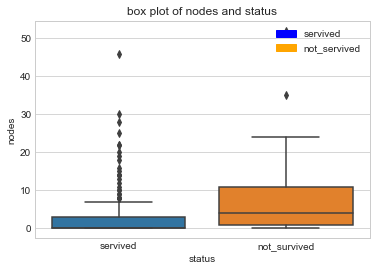

In [99]:
import matplotlib.patches as mpatches
sns.boxplot(x ="status",y="nodes",data = df).set_title("box plot of nodes and status")
blue = mpatches.Patch(color = "blue",label = "servived")
orange = mpatches.Patch(color="orange",label = "not_servived")
plt.legend(handles = [blue,orange],loc = 1)
plt.show()


observation:

1.patients who has node <= 40 are more chance to servival at status 1

2.patients who has node > 80 percentile are fall in servival status 2

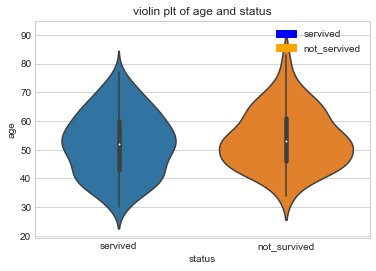

In [100]:
sns.violinplot(x="status", y="age", data=df, size=8)
plt.title("violin plt of age and status")
blue = mpatches.Patch(color="blue", label="servived")
orange = mpatches.Patch(color="orange", label="not_servived")
plt.legend(handles=[blue,orange],loc=1)
plt.show()

observation:

1. if the age in between 40 to 50 years who did sergery are more likely to be servive more than five years

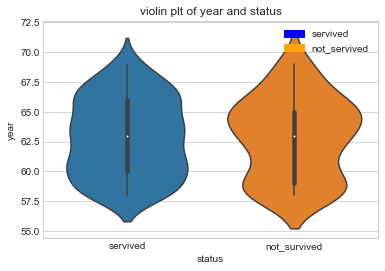

In [101]:
sns.violinplot(x="status", y="year", data=df, size=8)
plt.title("violin plt of year and status")
blue = mpatches.Patch(color='blue', label="servived")
orange = mpatches.Patch(color="orange", label="not_servived")
plt.legend(handles=[blue,orange],loc=1)
plt.show()

observation:
1.operation done at year 1960 are having more servival rate 

2.as number of years increases over sergery the patients servival status being reduced to status 2 i.e not_servived



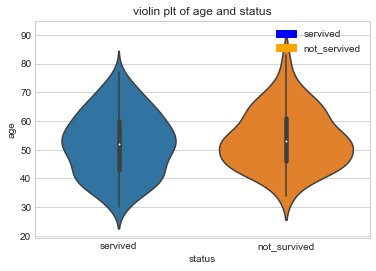

In [102]:
sns.violinplot(x="status", y="age", data=df, size=8)
plt.title("violin plt of age and status")
blue = mpatches.Patch(color="blue", label="servived")
orange = mpatches.Patch(color="orange", label="not_servived")
plt.legend(handles=[blue,orange],loc=1)
plt.show()

# conclusion

1.Patients with age of 30 to 40 years are servival more than five years after surgery

2.patients with age of more than 50 years are servival rate is less i.e less than five years 